In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
housing_data = pd.read_csv("C:\\Desktop\\PROJECT\\Housing.csv")
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
from sklearn.model_selection import train_test_split


X = housing_data.drop(["price"],axis = 1)
y = housing_data["price"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
train_data = X_train.join(y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
351,3600,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3780000
294,4000,4,2,2,no,no,no,no,no,0,no,semi-furnished,4200000
431,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000
346,2176,2,1,2,yes,yes,no,no,no,0,yes,semi-furnished,3850000
356,2520,5,2,1,no,no,yes,no,yes,1,no,furnished,3773000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished,4403000
544,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1750000
284,7770,2,1,1,yes,no,no,no,no,1,no,furnished,4270000
281,4500,2,1,1,yes,no,no,no,yes,2,no,furnished,4270000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

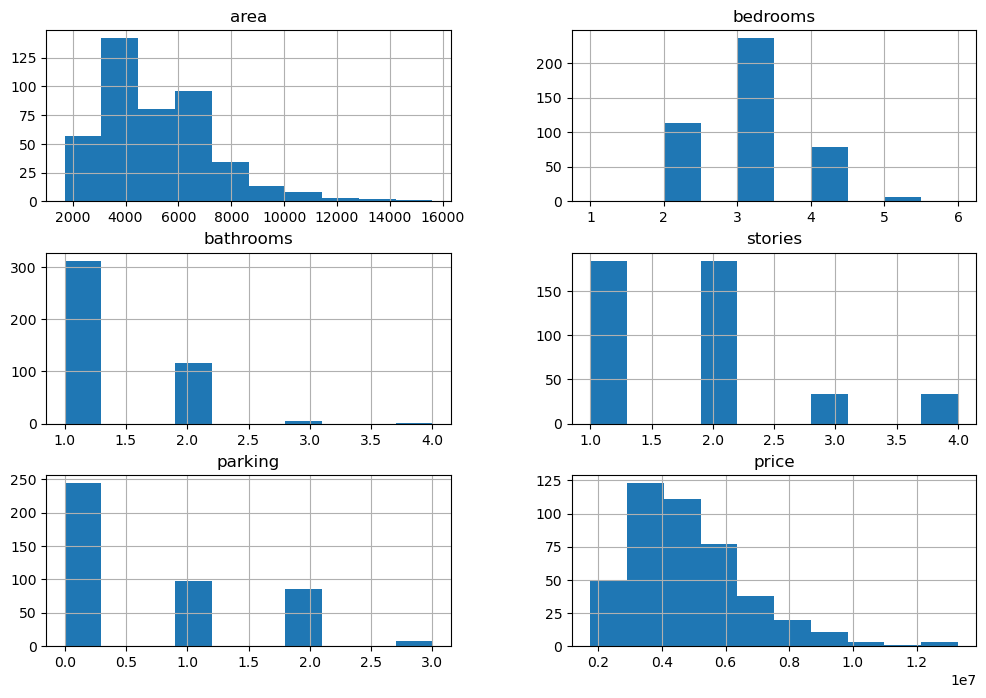

In [7]:
train_data.hist(figsize=(12,8))

In [8]:
train_data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    183
unfurnished       139
furnished         114
Name: count, dtype: int64

In [9]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop("furnishingstatus",axis=1)


In [10]:
# Replace specific strings with boolean values
train_data["updated_basement"] = train_data['basement'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_prefarea"] = train_data['prefarea'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_mainroad"] = train_data['mainroad'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_guestroom"] = train_data['guestroom'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_hotwaterheating"] = train_data['hotwaterheating'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_airconditioning"] = train_data['airconditioning'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})

# Convert the column to boolean type
train_data["updated_basement"] = train_data["updated_basement"].astype(bool)
train_data["updated_prefarea"] = train_data["updated_prefarea"].astype(bool)
train_data["updated_mainroad"] = train_data["updated_mainroad"].astype(bool)
train_data["updated_guestroom"] = train_data["updated_guestroom"].astype(bool)
train_data["updated_hotwaterheating"] = train_data["updated_hotwaterheating"].astype(bool)
train_data["updated_airconditioning"] = train_data["updated_airconditioning"].astype(bool)

# Drop the former basement column

train_data = train_data.drop(columns=["basement","prefarea","mainroad","guestroom","hotwaterheating","airconditioning"])
train_data

C:\Users\USER\AppData\Local\Temp\ipykernel_3444\19844316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["updated_basement"] = train_data['basement'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
C:\Users\USER\AppData\Local\Temp\ipykernel_3444\19844316.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["updated_prefarea"] = train_data['prefarea'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
C:\Users\USER\AppData\Local\Temp\ipykernel_3444\19844316.py:4: FutureWarning: Down

,area,bedrooms,bathrooms,stories,parking,price,furnished,semi-furnished,unfurnished,updated_basement,updated_prefarea,updated_mainroad,updated_guestroom,updated_hotwaterheating,updated_airconditioning
351,3600,2,1,1,0,3780000,False,True,False,False,False,True,False,False,False
294,4000,4,2,2,0,4200000,False,True,False,False,False,False,False,False,False
431,3180,4,1,2,0,3290000,False,False,True,True,False,True,False,False,True
346,2176,2,1,2,0,3850000,False,True,False,False,True,True,True,False,False
356,2520,5,2,1,1,3773000,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,4920,3,1,2,1,4403000,False,True,False,False,False,True,False,False,False
544,3850,3,1,2,0,1750000,False,False,True,False,False,True,False,False,False
284,7770,2,1,1,1,4270000,True,False,False,False,False,True,False,False,False
281,4500,2,1,1,2,4270000,True,False,False,False,False,True,False,False,True


<Axes: >

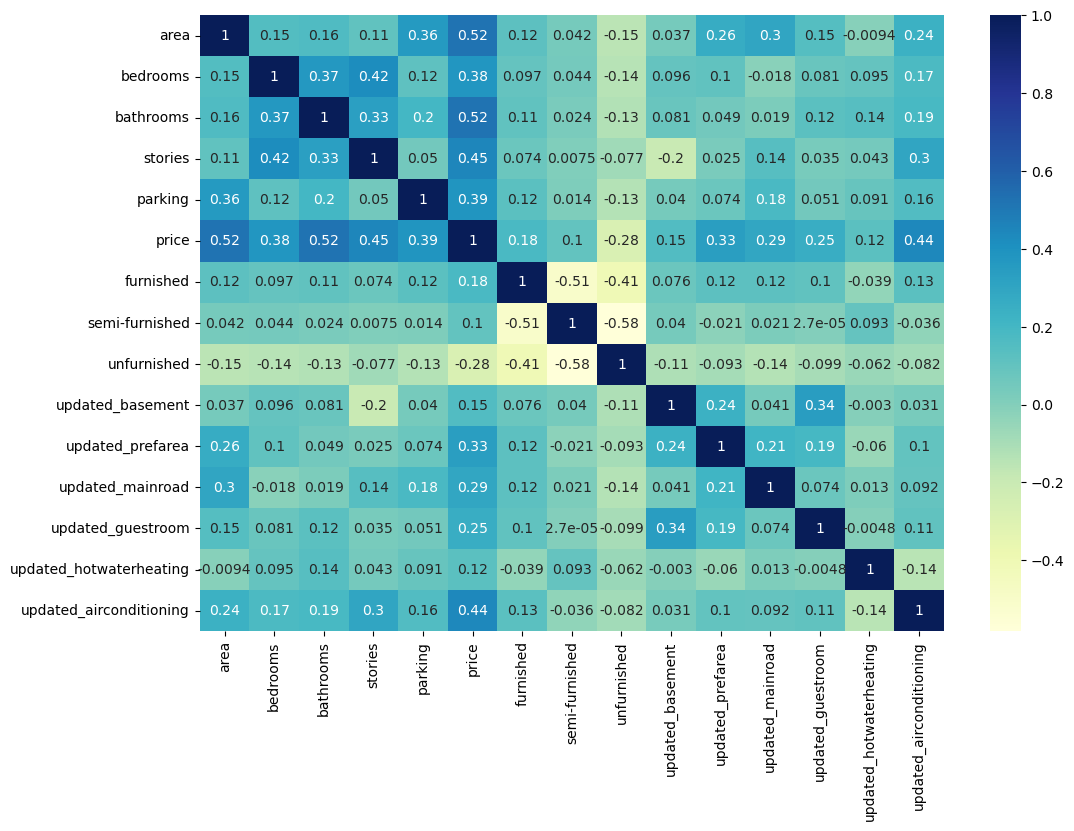

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= train_data.drop(["price"],axis = 1)
y_train = train_data["price"]
X_train_s = scaler.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop("furnishingstatus",axis=1)

# Replace specific strings with boolean values
test_data["updated_basement"] = test_data['basement'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_prefarea"] = test_data['prefarea'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_mainroad"] = test_data['mainroad'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_guestroom"] = test_data['guestroom'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_hotwaterheating"] = test_data['hotwaterheating'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_airconditioning"] = test_data['airconditioning'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})

# Convert the column to boolean type
test_data["updated_basement"] = test_data["updated_basement"].astype(bool)
test_data["updated_prefarea"] = test_data["updated_prefarea"].astype(bool)
test_data["updated_mainroad"] = test_data["updated_mainroad"].astype(bool)
test_data["updated_guestroom"] = test_data["updated_guestroom"].astype(bool)
test_data["updated_hotwaterheating"] = test_data["updated_hotwaterheating"].astype(bool)
test_data["updated_airconditioning"] = test_data["updated_airconditioning"].astype(bool)

# Drop the former basement column

test_data = test_data.drop(columns=["basement","prefarea","mainroad","guestroom","hotwaterheating","airconditioning"])
test_data

C:\Users\USER\AppData\Local\Temp\ipykernel_3444\26874869.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["updated_basement"] = test_data['basement'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
C:\Users\USER\AppData\Local\Temp\ipykernel_3444\26874869.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["updated_prefarea"] = test_data['prefarea'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
C:\Users\USER\AppData\Local\Temp\ipykernel_3444\26874869.py:8: FutureWarning: Downcast

,area,bedrooms,bathrooms,stories,parking,price,furnished,semi-furnished,unfurnished,updated_basement,updated_prefarea,updated_mainroad,updated_guestroom,updated_hotwaterheating,updated_airconditioning
543,2910,3,1,1,0,1750000,True,False,False,False,False,False,False,False,False
233,4160,3,1,1,0,4620000,False,False,True,True,False,True,True,False,True
449,1650,3,1,2,0,3150000,False,False,True,True,False,False,False,False,False
393,7424,3,1,1,0,3500000,False,False,True,False,False,False,False,False,False
50,7440,3,2,4,1,7420000,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,3290,2,1,1,1,3920000,True,False,False,False,False,True,False,True,False
141,6660,4,2,2,1,5652500,False,True,False,True,True,True,True,False,False
485,3630,2,1,1,0,2870000,False,False,True,False,False,True,False,False,False
272,4075,3,1,1,2,4340000,False,True,False,True,False,True,True,False,False


In [222]:
X_test= test_data.drop(["price"],axis = 1)
y_test = test_data["price"]
X_test_s = scaler.fit_transform(X_test)

model.score(X_test,y_test)

0.6728851798505735

In [224]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [226]:
forest.score(X_test,y_test)

0.7105918845134551

In [228]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid ={
    "n_estimators": [6,8,10,20],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",
                            return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [6, 8, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [229]:
best_forest = grid_search.best_estimator_

In [230]:
best_forest.score(X_test,y_test)

0.668069595967913

In [126]:
#rom sklearn.svm import SVR


#support = SVR(kernel='rbf') 
#support.fit(X_train,y_train)

SVR()

In [128]:
#support.score(X_test,y_test)

-0.013851090471193928